In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Underlying Byte Array
Python list is a very big object as each element has an overhead of pointers.

In [19]:
def info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)

In [85]:
d1 = np.arange(16,dtype=np.int8)
info(d1)
print (d1)

number of elements: 16
number of dimensions: 1
shape: (16,)
data type: int8
strides: (1,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [83]:
d2 = np.arange(16,dtype=np.int8).reshape(4,-1)
info(d2)
print(d2)

number of elements: 16
number of dimensions: 2
shape: (4, 4)
data type: int8
strides: (4, 1)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [81]:
from numpy.lib.stride_tricks import as_strided

In [88]:
# reshape
as_strided(d1, (4,4), (4,1))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]], dtype=int8)

In [86]:
# Transpose - Flip the strides
as_strided(d2, (4,4), (1,4))

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]], dtype=int8)

number of elements: 100
number of dimensions: 1
shape: (100,)
data type: float64
strides: (8,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



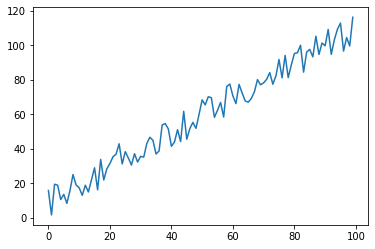

In [127]:
arr = np.arange(100) + np.random.rand(100,) * 20

plt.plot(arr)
info(arr)

In [134]:
# Sliding window
def sliding_window(a, window):
    new_shape = (len(a) - window + 1, window)
    s = a.strides[0]
    new_stride = (s, s)
    return as_strided(a, new_shape, new_stride)
sliding_window(d1, 3)

array([[ 0,  1,  2],
       [ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11],
       [10, 11, 12],
       [11, 12, 13],
       [12, 13, 14],
       [13, 14, 15]], dtype=int8)

In [135]:
# smooth
def smooth(a, window=3):
    sw = sliding_window(a, window)
    return sw.mean(axis=1)
smooth(d1,3)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

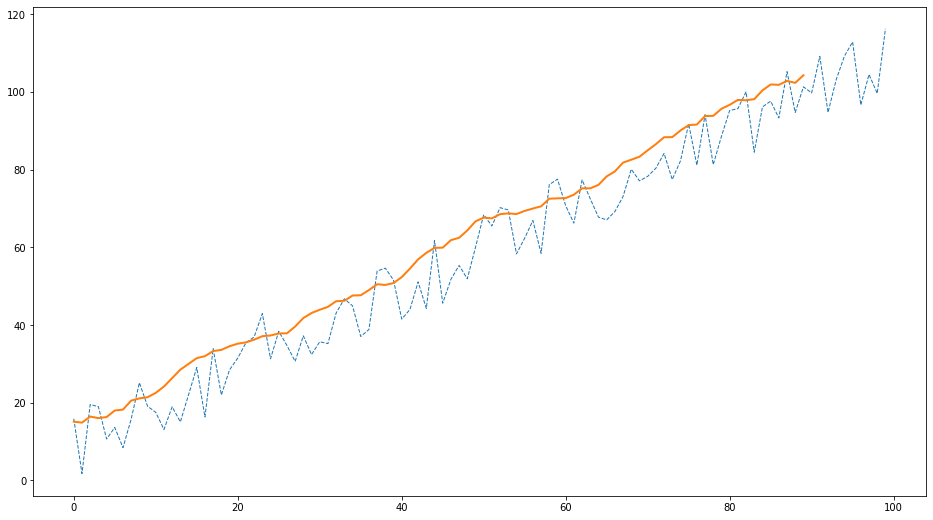

In [145]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(arr, linewidth=1, linestyle='--')
ax.plot(smooth(arr,11), linewidth=2)

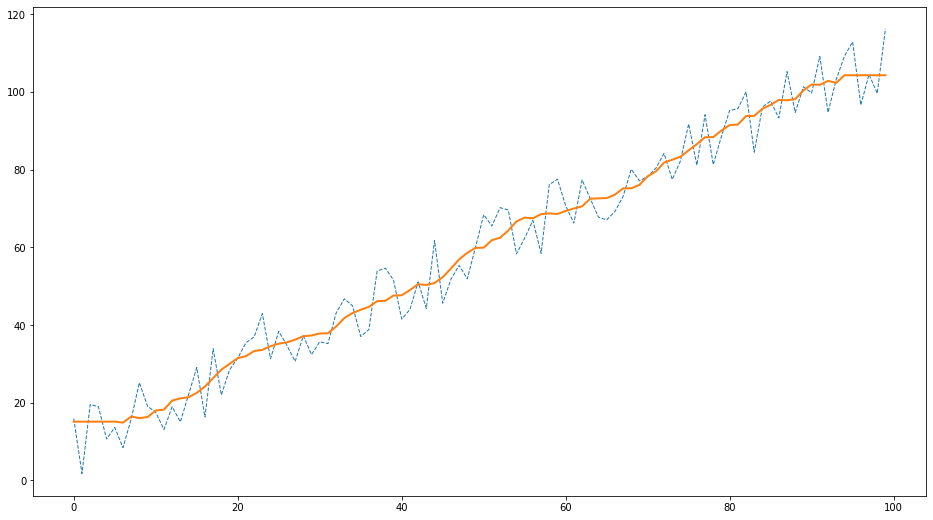

In [146]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(arr, linewidth=1, linestyle='--')
ax.plot(np.pad(smooth(arr,11),5, mode='edge'b), linewidth=2)

# Edge Detection
Edge detection is done by taking a sliding window of 3x3 and multiplying by the filter: 
```
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]```
 
**Example:**
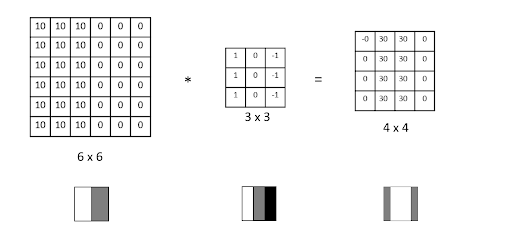

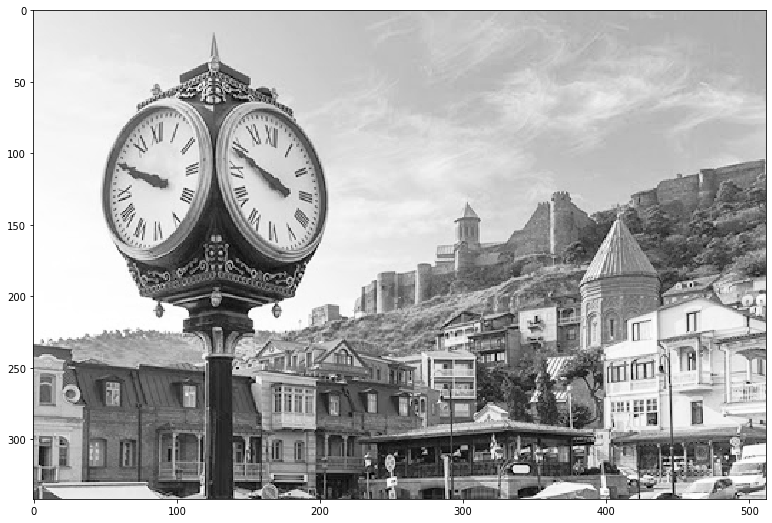

In [355]:
img = np.loadtxt('rsrc/tbilisi.npy')

fix, ax = plt.subplots(figsize=(16,9))
ax.imshow(img,cmap='Greys')

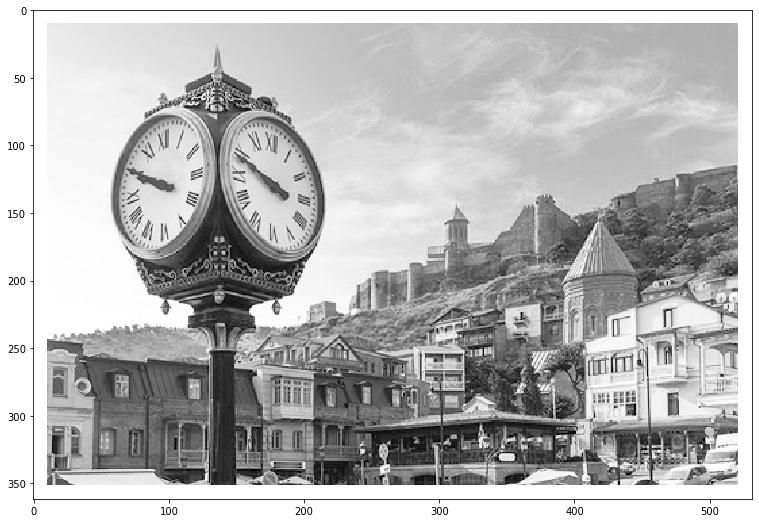

In [356]:
new_img = np.pad(img,10)
fix, ax = plt.subplots(figsize=(16,9))
ax.imshow(new_img,cmap='Greys')

In [357]:
d2 = np.arange(16).reshape(4,4) + 1
d2

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [358]:
# Write a sliding window function
def sliding_window_2d(img, window):
    padding = window - 1
    padded = np.pad(img, padding,mode='reflect')
    r, c = img.shape
    new_shape = (r, c,window, window)
    s0, s1 = padded.strides
    new_stride = (s0, s1, s0, s1)
    return as_strided(padded, new_shape, new_stride)
sw = sliding_window_2d(d2, 3)
print (sw.shape)

print (sw.mean(axis=-1).mean(axis=-1))

(4, 4, 3, 3)
[[ 6.          5.66666667  6.          7.        ]
 [ 4.66666667  4.33333333  4.66666667  5.66666667]
 [ 6.          5.66666667  6.          7.        ]
 [10.          9.66666667 10.         11.        ]]


In [361]:
new_img = sliding_window_2d(img,5)
print(new_img.shape)
print(img.shape)

(342, 512, 5, 5)
(342, 512)


(342, 512)


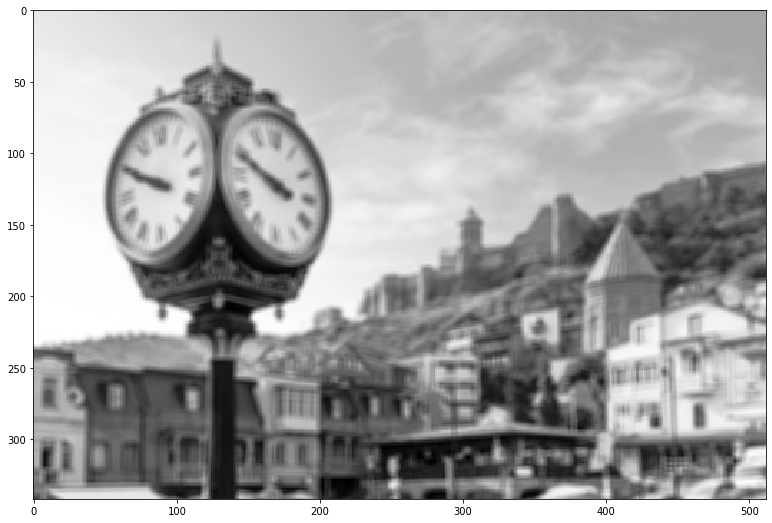

In [362]:
new_img = new_img.mean(axis=-1).mean(axis=-1)
print(new_img.shape)
fix, ax = plt.subplots(figsize=(16,9))
ax.imshow(new_img,cmap='Greys')

In [364]:
filt = (np.array([[1,0,-1],[1,0,-1],[1,0,-1]]))
print(filt)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


(342, 512, 3, 3)
0.0 1.0


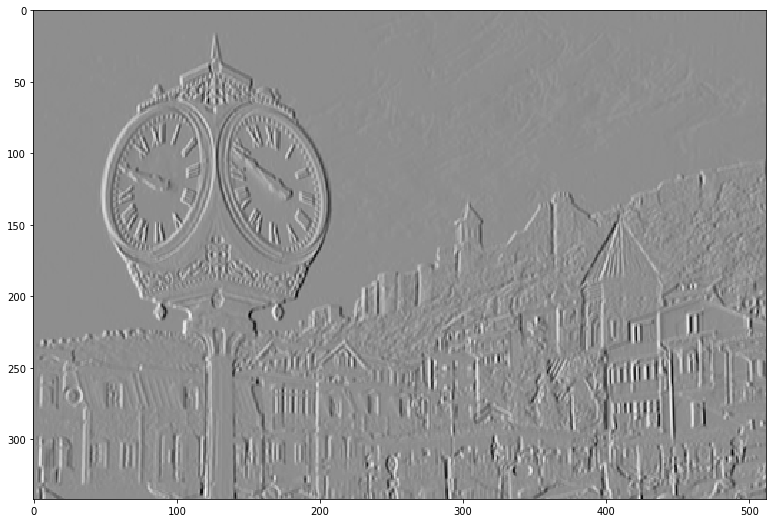

In [365]:
new_img = sliding_window_2d(img,3)
print(new_img.shape)
fix, ax = plt.subplots(figsize=(16,9))
new_img = new_img * filt
# "Flatten"
new_img = new_img.sum(axis=-1).sum(axis=-1)
# Normalize
new_img = (new_img - new_img.min())
new_img /=  new_img.max()
print(new_img.min(),new_img.max())
ax.imshow(new_img,cmap='Greys')

# Wrap it Up
[REF](https://jessicastringham.net/2017/12/31/stride-tricks/)

In [366]:
def filter_image(img, filt):
    window, c = filt.shape
    assert window == c, "Filter should be square"
    new_img = sliding_window_2d(img, window)
    new_img = new_img * filt
    # "Flatten"
    new_img = new_img.sum(axis=-1).sum(axis=-1)
    # Normalize
    new_img = (new_img - new_img.min())
    new_img /=  new_img.max()
    return new_img    

def draw(img):
    fix, ax = plt.subplots(figsize=(16,9))
    ax.imshow(img,cmap='Greys')
    plt.show()


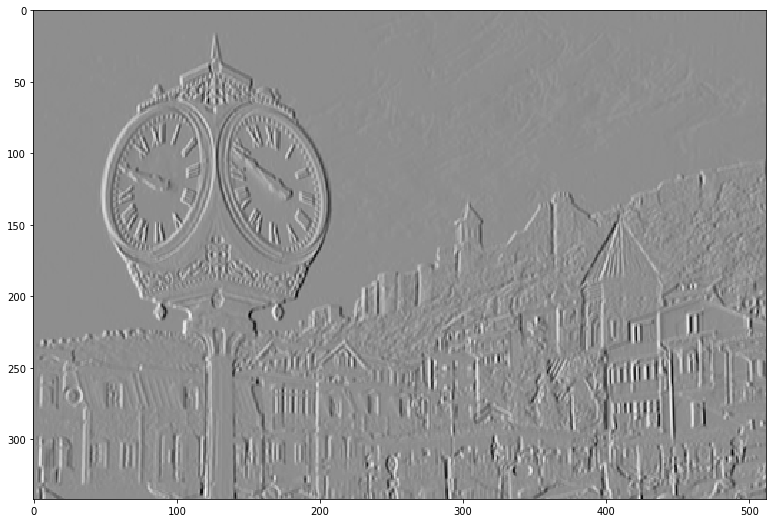

In [367]:
draw(filter_image(img, filt))

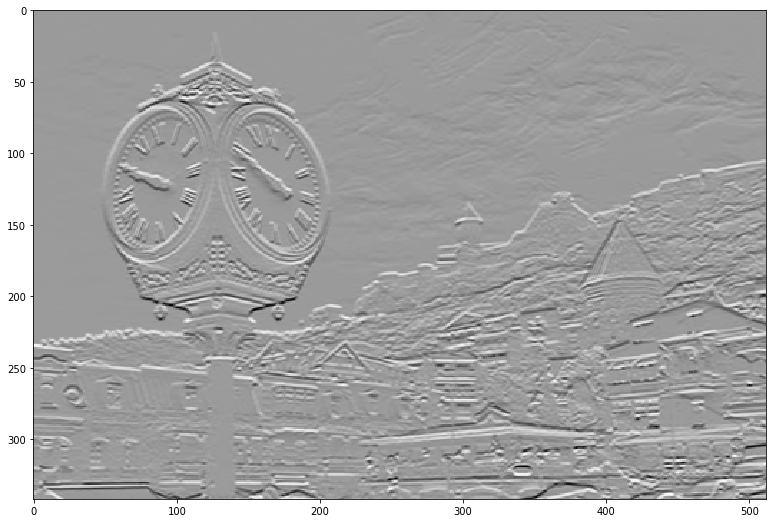

In [368]:
draw(filter_image(img, filt.T))

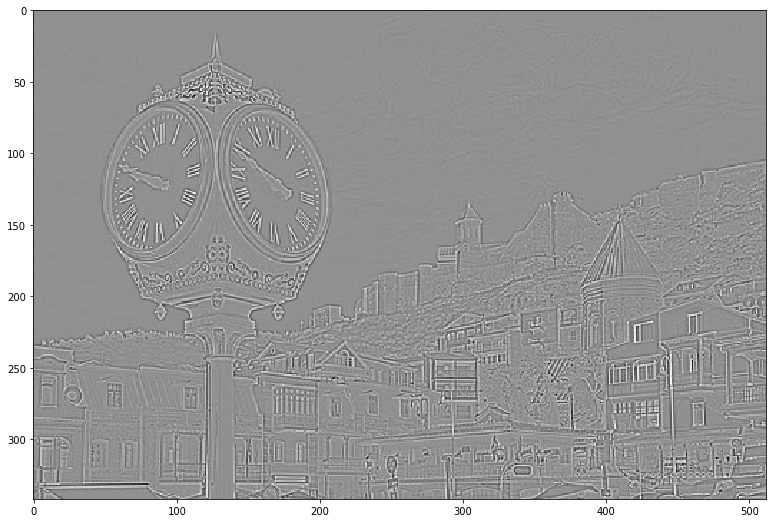

In [369]:
filt2 = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])
draw(filter_image(img, filt2))

# DataFrame

In [5]:
df = pd.DataFrame({'a':[1,2,3,4], 'b':list('abca'), 'c':[100,20,123,11]})
df

,a,b,c
0,1,a,100
1,2,b,20
2,3,c,123
3,4,a,11


In [7]:
df.as_blocks()

AttributeError: 'DataFrame' object has no attribute 'as_blocks'